# Beer Recommendation System

![Image of NYC](https://static.vinepair.com/wp-content/uploads/2017/07/sour-beer-inside.jpg)


##### Giselle Bagatini
##### 25/03/2020

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import statsmodels.api as sm
from scipy import stats




ERROR! Session/line number was not unique in database. History logging moved to new session 630


### LOADING DATA

In [2]:
df_1 = pd.read_csv("beer_data/beer3.csv")
df_2 = pd.read_csv("beer_data/beer2.csv")
df_3 = pd.read_csv("beer_data/beer4.csv")
df_4 = pd.read_csv("beer_data/links.csv")
df_5 = pd.read_csv("beer_data/new.csv")
df_6 = pd.read_csv("beer_data/beer7.csv")
df_7 = pd.read_csv("beer_data/beer8.csv")
df_8 = pd.read_csv("beer_data/beer9.csv")
df_9 = pd.read_csv("beer_data/beer10.csv")
df_10 = pd.read_csv("beer_data/beer11.csv")
df_11 = pd.read_csv("beer_data/beer_tentativa.csv")
df_12 = pd.read_csv("beer_data/beer_tentativa2.csv")
# I have files from different days that I ran the scrapper!

C:\Users\gisel\Anaconda3\envs\deeplearning\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (11,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\gisel\Anaconda3\envs\deeplearning\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,6,7,8,10,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\gisel\Anaconda3\envs\deeplearning\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\gisel\Anaconda3\envs\deeplearning\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or s

In [3]:
print(df_1.shape[0])
print(df_2.shape[0])
print(df_3.shape[0])
print(df_4.shape[0])
print(df_5.shape[0])
print(df_6.shape[0])
print(df_7.shape[0])
print(df_8.shape[0])
print(df_9.shape[0])
print(df_10.shape[0])
print(df_11.shape[0])
print(df_12.shape[0])

280511
136232
576721
119980
67840
289990
320358
382810
273534
168028
244112
656944


### MERGING DATA

In [4]:
df_total = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6,df_7,df_8, df_9, df_10, df_11, df_12], axis=0)

In [5]:
df_total.shape

(3517060, 24)

In [6]:
df_total.head(1)

,url,title,company,Style,Style_Ranked,ABV,Score,Score_Ranked,Avg,pDev,...,Brewery_Country,Avail,Wants,Gots,usr_BAscore_norm,usr_rDev,usr_component,usr_comment,usr_username,usr_date
0,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39,6.6%,84,0,3.76,12.77%,...,United States,Rotating,11,1,3.08,-18.1%,look: 3.5 | smell: 3 | taste: 3 | feel: 3.5 | ...,"deep russet brown, with no head anda very mini...",mikesgroove,"Sep 19, 2011"


###### Since I have scrapped the web in different days and my scrapper is randomly going to each website, I need to make sure I'm deleting all the duplicates beers and reviews it collected.

In [7]:
df_total = df_total.drop_duplicates()

In [8]:
df_total.shape

(2254735, 24)

 - As we can see below, a few of duplicates were not deleted yet, mostly because the delete duplicate method doesn;t see Nan == Nan. I need to clean the dataset first before droping the rest of duplicates!

In [9]:
df_total[df_total["title"] =="Fuzzy Duckling"]

,url,title,company,Style,Style_Ranked,ABV,Score,Score_Ranked,Avg,pDev,...,Brewery_Country,Avail,Wants,Gots,usr_BAscore_norm,usr_rDev,usr_component,usr_comment,usr_username,usr_date
122188,https://www.beeradvocate.com/beer/profile/4369...,Fuzzy Duckling,Twin Elephant Brewing Company,German Hefeweizen,0,5.5%,NaN,0,3.8,1.84%,...,United States,Rotating,0,1,3.73,-1.8%,look: 3.25 | smell: 4 | taste: 3.75 | feel: 3....,A: solid amber color with some nice burnt cara...,hopsputin,"Jul 14, 2017"
122191,https://www.beeradvocate.com/beer/profile/4369...,Fuzzy Duckling,Twin Elephant Brewing Company,German Hefeweizen,0,5.5%,NaN,0,3.8,1.84%,...,United States,Rotating,0,1,3.89,+2.4%,look: 3.75 | smell: 4 | taste: 4 | feel: 3.5 |...,"On-tap @ Twin Elephant Brewing Co. in Chatham,...",Jacobier10,"Jan 07, 2017"
128031,https://www.beeradvocate.com/beer/profile/4369...,Fuzzy Duckling,Twin Elephant Brewing Company,German Hefeweizen,0,5.5%,NaN,0,3.8,1.84%,...,United States,Rotating,0,1,3.73,-1.8%,look: 3.25 | smell: 4 | taste: 3.75 | feel: 3....,A: solid amber color with some nice burnt cara...,hopsputin,"Jul 14, 2017"
128032,https://www.beeradvocate.com/beer/profile/4369...,Fuzzy Duckling,Twin Elephant Brewing Company,German Hefeweizen,0,5.5%,NaN,0,3.8,1.84%,...,United States,Rotating,0,1,3.89,+2.4%,look: 3.75 | smell: 4 | taste: 4 | feel: 3.5 |...,"On-tap @ Twin Elephant Brewing Co. in Chatham,...",Jacobier10,"Jan 07, 2017"
168026,https://www.beeradvocate.com/beer/profile/4369...,Fuzzy Duckling,Twin Elephant Brewing Company,German Hefeweizen,0,5.5%,NaN,0,3.8,1.84%,...,United States,Rotating,0,1,3.73,-1.8%,look: 3.25 | smell: 4 | taste: 3.75 | feel: 3....,A: solid amber color with some nice burnt cara...,hopsputin,"Jul 14, 2017"


In [10]:
df_total.loc[df_total["title"] == 0] 

,url,title,company,Style,Style_Ranked,ABV,Score,Score_Ranked,Avg,pDev,...,Brewery_Country,Avail,Wants,Gots,usr_BAscore_norm,usr_rDev,usr_component,usr_comment,usr_username,usr_date


In [11]:
beer_df =df_total.reset_index(drop =True)

In [12]:
beer_df.head()

,url,title,company,Style,Style_Ranked,ABV,Score,Score_Ranked,Avg,pDev,...,Brewery_Country,Avail,Wants,Gots,usr_BAscore_norm,usr_rDev,usr_component,usr_comment,usr_username,usr_date
0,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39,6.6%,84,0,3.76,12.77%,...,United States,Rotating,11,1,3.08,-18.1%,look: 3.5 | smell: 3 | taste: 3 | feel: 3.5 | ...,"deep russet brown, with no head anda very mini...",mikesgroove,"Sep 19, 2011"
1,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39,6.6%,84,0,3.76,12.77%,...,United States,Rotating,11,1,3.13,-16.8%,look: 3.5 | smell: 3 | taste: 3 | feel: 3 | ov...,This poured out as a pretty nice looking brown...,Knapp85,"Jun 11, 2011"
2,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39,6.6%,84,0,3.76,12.77%,...,United States,Rotating,11,1,4.07,+8.2%,look: 3.5 | smell: 4 | taste: 4 | feel: 4 | ov...,Thanks to my BA buddy WJVII for a brew I haven...,drizzam,"Sep 29, 2010"
3,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39,6.6%,84,0,3.76,12.77%,...,United States,Rotating,11,1,3.38,-10.1%,look: 3.5 | smell: 3 | taste: 3.5 | feel: 3.5 ...,A - pours a clear dark mahogany brown with no ...,mikereaser,"Jun 29, 2010"
4,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39,6.6%,84,0,3.76,12.77%,...,United States,Rotating,11,1,4.07,+8.2%,look: 3.5 | smell: 4 | taste: 4 | feel: 4 | ov...,"Another bock,Poured from the bottle a nice amb...",mvanaskie13,"May 25, 2010"


In [13]:
beer_df.shape

(2254735, 24)

### DATA CLEANING

In [14]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254735 entries, 0 to 2254734
Data columns (total 24 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   url               object
 1   title             object
 2   company           object
 3   Style             object
 4   Style_Ranked      object
 5   ABV               object
 6   Score             object
 7   Score_Ranked      object
 8   Avg               object
 9   pDev              object
 10  Reviews           object
 11  Ratings           object
 12  Brewery_Name      object
 13  Brewery_City      object
 14  Brewery_Country   object
 15  Avail             object
 16  Wants             object
 17  Gots              object
 18  usr_BAscore_norm  object
 19  usr_rDev          object
 20  usr_component     object
 21  usr_comment       object
 22  usr_username      object
 23  usr_date          object
dtypes: object(24)
memory usage: 412.9+ MB


In [15]:
beer_df.isna().sum()

url                      0
title                    0
company                  0
Style                    0
Style_Ranked             0
ABV                      0
Score               388102
Score_Ranked             0
Avg                      0
pDev                     0
Reviews                  0
Ratings                  0
Brewery_Name             0
Brewery_City        413396
Brewery_Country       3173
Avail                   13
Wants                    0
Gots                     0
usr_BAscore_norm         0
usr_rDev                 0
usr_component          244
usr_comment           1038
usr_username           340
usr_date                 0
dtype: int64

In [16]:
(beer_df["ABV"] == "not listed").value_counts()

False    2190771
True       63964
Name: ABV, dtype: int64

In [17]:
beer_df["ABV"] = beer_df["ABV"].loc[:].str.replace("%", "")

In [18]:
beer_df["ABV"] = beer_df["ABV"].loc[:].str.replace("not listed", "0")

In [19]:
beer_df.loc[beer_df["ABV"] == "ABV"]

,url,title,company,Style,Style_Ranked,ABV,Score,Score_Ranked,Avg,pDev,...,Brewery_Country,Avail,Wants,Gots,usr_BAscore_norm,usr_rDev,usr_component,usr_comment,usr_username,usr_date
382739,url,title,company,Style,Style_Ranked,ABV,Score,Score_Ranked,Avg,pDev,...,Brewery_Country,Avail,Wants,Gots,usr_BAscore_norm,usr_rDev,usr_component,usr_comment,usr_username,usr_date


In [20]:
beer_df = beer_df.drop(beer_df.index[382739])


In [21]:
beer_df.shape

(2254734, 24)

In [22]:
beer_df["ABV"] = beer_df["ABV"].astype("float")

In [23]:
beer_df["Wants"] = beer_df["Wants"].astype("str")

In [24]:
beer_df["Wants"] = beer_df["Wants"].loc[:].str.replace(",", "")

In [25]:
beer_df["Wants"] = pd.to_numeric(beer_df["Wants"])

In [26]:
beer_df["Ratings"] = beer_df["Ratings"].astype("str")

In [27]:
beer_df["Ratings"] = beer_df["Ratings"].loc[:].str.replace(",", "")

In [28]:
beer_df["Ratings"] = pd.to_numeric(beer_df["Ratings"])

In [29]:
beer_df["Gots"] = beer_df["Gots"].astype("str")

In [30]:
beer_df["Gots"] = beer_df["Gots"].loc[:].str.replace(",", "")

In [31]:
beer_df["Gots"] = pd.to_numeric(beer_df["Gots"])

In [32]:
beer_df.isna().sum()

url                      0
title                    0
company                  0
Style                    0
Style_Ranked             0
ABV                      0
Score               388102
Score_Ranked             0
Avg                      0
pDev                     0
Reviews                  0
Ratings                  0
Brewery_Name             0
Brewery_City        413396
Brewery_Country       3173
Avail                   13
Wants                    0
Gots                     0
usr_BAscore_norm         0
usr_rDev                 0
usr_component          244
usr_comment           1038
usr_username           340
usr_date                 0
dtype: int64

In [33]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254734 entries, 0 to 2254734
Data columns (total 24 columns):
 #   Column            Dtype  
---  ------            -----  
 0   url               object 
 1   title             object 
 2   company           object 
 3   Style             object 
 4   Style_Ranked      object 
 5   ABV               float64
 6   Score             object 
 7   Score_Ranked      object 
 8   Avg               object 
 9   pDev              object 
 10  Reviews           object 
 11  Ratings           int64  
 12  Brewery_Name      object 
 13  Brewery_City      object 
 14  Brewery_Country   object 
 15  Avail             object 
 16  Wants             int64  
 17  Gots              int64  
 18  usr_BAscore_norm  object 
 19  usr_rDev          object 
 20  usr_component     object 
 21  usr_comment       object 
 22  usr_username      object 
 23  usr_date          object 
dtypes: float64(1), int64(3), object(20)
memory usage: 430.1+ MB


In [34]:
df_list = beer_df[["Style_Ranked","Score_Ranked",'Avg','usr_BAscore_norm', "Score"]]
for col in df_list:
    beer_df[col] = beer_df[col].astype(float)

In [35]:
beer_df = beer_df.drop(["pDev", "usr_rDev"], axis = 1 )

In [36]:
beer_df.isna().sum()

url                      0
title                    0
company                  0
Style                    0
Style_Ranked             0
ABV                      0
Score               388102
Score_Ranked             0
Avg                      0
Reviews                  0
Ratings                  0
Brewery_Name             0
Brewery_City        413396
Brewery_Country       3173
Avail                   13
Wants                    0
Gots                     0
usr_BAscore_norm         0
usr_component          244
usr_comment           1038
usr_username           340
usr_date                 0
dtype: int64

In [37]:
np.mean(beer_df.isna(), axis = 0)

url                 0.000000
title               0.000000
company             0.000000
Style               0.000000
Style_Ranked        0.000000
ABV                 0.000000
Score               0.172128
Score_Ranked        0.000000
Avg                 0.000000
Reviews             0.000000
Ratings             0.000000
Brewery_Name        0.000000
Brewery_City        0.183346
Brewery_Country     0.001407
Avail               0.000006
Wants               0.000000
Gots                0.000000
usr_BAscore_norm    0.000000
usr_component       0.000108
usr_comment         0.000460
usr_username        0.000151
usr_date            0.000000
dtype: float64

In [38]:
beer_df["Brewery_City"].fillna("Unknown", inplace = True)

In [39]:
beer_df["Brewery_Country"].fillna("Unknown", inplace = True)

In [40]:
beer_df["Avail"].fillna("Unknown", inplace = True)

In [41]:
beer_df = beer_df[~beer_df['usr_comment'].isna()]
beer_df = beer_df[~beer_df['usr_username'].isna()]


In [42]:
beer_df.shape

(2253356, 22)

In [43]:
beer_df["Score"].fillna(beer_df["Score"].mean(), inplace = True)


In [44]:
beer_df["usr_component"].unique()

array(['look: 3.5 | smell: 3 | taste: 3 | feel: 3.5 | overall: 3',
       'look: 3.5 | smell: 3 | taste: 3 | feel: 3 | overall: 3.5',
       'look: 3.5 | smell: 4 | taste: 4 | feel: 4 | overall: 4.5', ...,
       'look: 2.5 | smell: 2.5 | taste: 2.75 | feel: 2.5 | overall: 3.25',
       'look: 2 | smell: 1.75 | taste: 2.75 | feel: 2.5 | overall: 2.25',
       'look: 4 | smell: 3.25 | taste: 3.5 | feel: 3.25 |  overall: 3.5'],
      dtype=object)

In [45]:
beer_df[['Look_rating','Smell_rating', 'tasting_rating','feel_rating','overall_rating']] = beer_df.usr_component.str.split("|",expand=True)


In [46]:
beer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2253356 entries, 0 to 2254734
Data columns (total 27 columns):
 #   Column            Dtype  
---  ------            -----  
 0   url               object 
 1   title             object 
 2   company           object 
 3   Style             object 
 4   Style_Ranked      float64
 5   ABV               float64
 6   Score             float64
 7   Score_Ranked      float64
 8   Avg               float64
 9   Reviews           object 
 10  Ratings           int64  
 11  Brewery_Name      object 
 12  Brewery_City      object 
 13  Brewery_Country   object 
 14  Avail             object 
 15  Wants             int64  
 16  Gots              int64  
 17  usr_BAscore_norm  float64
 18  usr_component     object 
 19  usr_comment       object 
 20  usr_username      object 
 21  usr_date          object 
 22  Look_rating       object 
 23  Smell_rating      object 
 24  tasting_rating    object 
 25  feel_rating       object 
 26  overall_rating

In [47]:
beer_df.head(200)

,url,title,company,Style,Style_Ranked,ABV,Score,Score_Ranked,Avg,Reviews,...,usr_BAscore_norm,usr_component,usr_comment,usr_username,usr_date,Look_rating,Smell_rating,tasting_rating,feel_rating,overall_rating
0,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,3.08,look: 3.5 | smell: 3 | taste: 3 | feel: 3.5 | ...,"deep russet brown, with no head anda very mini...",mikesgroove,"Sep 19, 2011",look: 3.5,smell: 3,taste: 3,feel: 3.5,overall: 3
1,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,3.13,look: 3.5 | smell: 3 | taste: 3 | feel: 3 | ov...,This poured out as a pretty nice looking brown...,Knapp85,"Jun 11, 2011",look: 3.5,smell: 3,taste: 3,feel: 3,overall: 3.5
2,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,4.07,look: 3.5 | smell: 4 | taste: 4 | feel: 4 | ov...,Thanks to my BA buddy WJVII for a brew I haven...,drizzam,"Sep 29, 2010",look: 3.5,smell: 4,taste: 4,feel: 4,overall: 4.5
3,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,3.38,look: 3.5 | smell: 3 | taste: 3.5 | feel: 3.5 ...,A - pours a clear dark mahogany brown with no ...,mikereaser,"Jun 29, 2010",look: 3.5,smell: 3,taste: 3.5,feel: 3.5,overall: 3.5
4,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,4.07,look: 3.5 | smell: 4 | taste: 4 | feel: 4 | ov...,"Another bock,Poured from the bottle a nice amb...",mvanaskie13,"May 25, 2010",look: 3.5,smell: 4,taste: 4,feel: 4,overall: 4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,https://www.beeradvocate.com/beer/profile/388/...,Gueuze 100% Lambic,Brasserie Cantillon,Belgian Gueuze,3.0,5.0,98.0,0.0,4.48,934,...,4.55,look: 4.25 | smell: 4.25 | taste: 4.75 | feel:...,Pours hazy orange yellow out of the bottle. Th...,Bshaw22,"Aug 19, 2019",look: 4.25,smell: 4.25,taste: 4.75,feel: 4.75,overall: 4.5
196,https://www.beeradvocate.com/beer/profile/388/...,Gueuze 100% Lambic,Brasserie Cantillon,Belgian Gueuze,3.0,5.0,98.0,0.0,4.48,934,...,3.50,look: 3.5 | smell: 3.5 | taste: 3.5 | feel: 3....,Split a 37.5 cl bottle at a friend's home. My ...,rapayn01,"Mar 20, 2019",look: 3.5,smell: 3.5,taste: 3.5,feel: 3.5,overall: 3.5
197,https://www.beeradvocate.com/beer/profile/388/...,Gueuze 100% Lambic,Brasserie Cantillon,Belgian Gueuze,3.0,5.0,98.0,0.0,4.48,934,...,4.53,look: 4.5 | smell: 4.5 | taste: 4.5 | feel: 4....,2017 vintage enjoyed in the first days of 2019...,Bruno74200,"Jan 22, 2019",look: 4.5,smell: 4.5,taste: 4.5,feel: 4.75,overall: 4.5
198,https://www.beeradvocate.com/beer/profile/2322...,Pseudo Sue - Double Dry-Hopped,Toppling Goliath Brewing Company,American Pale Ale (APA),4.0,6.8,100.0,0.0,4.56,174,...,4.48,look: 4.5 | smell: 4.5 | taste: 4.5 | feel: 4....,"06/2016 - supremely creamy, nice hop character...",Zach_Attack,"Sep 26, 2018",look: 4.5,smell: 4.5,taste: 4.5,feel: 4.25,overall: 4.5


In [48]:
beer_df["Look_rating"] = beer_df["Look_rating"].loc[:].str.replace("look: ", "")

In [49]:
beer_df["Look_rating"] = beer_df["Look_rating"].loc[:].str.replace("characters", "")

In [50]:
beer_df["Look_rating"].fillna(0, inplace = True)

In [51]:
beer_df["Smell_rating"] = beer_df["Smell_rating"].loc[:].str.replace("smell: ", "")

In [52]:
beer_df["tasting_rating"] = beer_df["tasting_rating"].loc[:].str.replace("taste: ", "")

In [53]:
beer_df["feel_rating"] = beer_df["feel_rating"].loc[:].str.replace("feel: ", "")

In [54]:
beer_df["overall_rating"] = beer_df["overall_rating"].loc[:].str.replace("overall: ", "")

In [55]:
beer_df["Smell_rating"].fillna(0, inplace = True)

In [56]:
beer_df["tasting_rating"].fillna(0, inplace = True)

In [57]:
beer_df["feel_rating"].fillna(0, inplace = True)

In [58]:
beer_df["overall_rating"].fillna(0, inplace = True)

In [59]:
columns = beer_df[["Look_rating", "Smell_rating", "tasting_rating", "feel_rating", "overall_rating"]]

for col in columns:
    beer_df[col] = beer_df[col].loc[:].str.replace(",", "")
    beer_df[col] = beer_df[col].astype(float)
    beer_df[col].fillna(beer_df[col].mean(), inplace = True)


In [60]:
beer_df.isna().sum()

url                 0
title               0
company             0
Style               0
Style_Ranked        0
ABV                 0
Score               0
Score_Ranked        0
Avg                 0
Reviews             0
Ratings             0
Brewery_Name        0
Brewery_City        0
Brewery_Country     0
Avail               0
Wants               0
Gots                0
usr_BAscore_norm    0
usr_component       0
usr_comment         0
usr_username        0
usr_date            0
Look_rating         0
Smell_rating        0
tasting_rating      0
feel_rating         0
overall_rating      0
dtype: int64

In [61]:
beer_df.head()

,url,title,company,Style,Style_Ranked,ABV,Score,Score_Ranked,Avg,Reviews,...,usr_BAscore_norm,usr_component,usr_comment,usr_username,usr_date,Look_rating,Smell_rating,tasting_rating,feel_rating,overall_rating
0,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,3.08,look: 3.5 | smell: 3 | taste: 3 | feel: 3.5 | ...,"deep russet brown, with no head anda very mini...",mikesgroove,"Sep 19, 2011",3.5,3.0,3.0,3.5,3.0
1,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,3.13,look: 3.5 | smell: 3 | taste: 3 | feel: 3 | ov...,This poured out as a pretty nice looking brown...,Knapp85,"Jun 11, 2011",3.5,3.0,3.0,3.0,3.5
2,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,4.07,look: 3.5 | smell: 4 | taste: 4 | feel: 4 | ov...,Thanks to my BA buddy WJVII for a brew I haven...,drizzam,"Sep 29, 2010",3.5,4.0,4.0,4.0,4.5
3,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,3.38,look: 3.5 | smell: 3 | taste: 3.5 | feel: 3.5 ...,A - pours a clear dark mahogany brown with no ...,mikereaser,"Jun 29, 2010",3.5,3.0,3.5,3.5,3.5
4,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,4.07,look: 3.5 | smell: 4 | taste: 4 | feel: 4 | ov...,"Another bock,Poured from the bottle a nice amb...",mvanaskie13,"May 25, 2010",3.5,4.0,4.0,4.0,4.5


In [62]:
beer_df.columns

Index(['url', 'title', 'company', 'Style', 'Style_Ranked', 'ABV', 'Score',
       'Score_Ranked', 'Avg', 'Reviews', 'Ratings', 'Brewery_Name',
       'Brewery_City', 'Brewery_Country', 'Avail', 'Wants', 'Gots',
       'usr_BAscore_norm', 'usr_component', 'usr_comment', 'usr_username',
       'usr_date', 'Look_rating', 'Smell_rating', 'tasting_rating',
       'feel_rating', 'overall_rating'],
      dtype='object')

In [63]:
beer_df.columns = ['URL', 'Beer name', 'Brewery', 'Style', 'Style_Ranked', 'ABV', 'Score',
       'Score_Ranked', 'Avg Rating', 'Reviews', 'N_Ratings', 'Brewery_Name',
       'Brewery_City', 'Brewery_Country', 'Availability', 'N_Wants', 'N_Gots',
       'User Score', 'User_ratings', 'User comment', 'Username',
       'Date Review', 'Look_rating', 'Smell_rating', 'tasting_rating',
       'feel_rating', 'overall_rating']

In [64]:
beer_df.head(2)

,URL,Beer name,Brewery,Style,Style_Ranked,ABV,Score,Score_Ranked,Avg Rating,Reviews,...,User Score,User_ratings,User comment,Username,Date Review,Look_rating,Smell_rating,tasting_rating,feel_rating,overall_rating
0,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,3.08,look: 3.5 | smell: 3 | taste: 3 | feel: 3.5 | ...,"deep russet brown, with no head anda very mini...",mikesgroove,"Sep 19, 2011",3.5,3.0,3.0,3.5,3.0
1,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,3.13,look: 3.5 | smell: 3 | taste: 3 | feel: 3 | ov...,This poured out as a pretty nice looking brown...,Knapp85,"Jun 11, 2011",3.5,3.0,3.0,3.0,3.5


In [65]:
beer_df.shape

(2253356, 27)

In [66]:
beer_df= beer_df.drop_duplicates()

In [67]:
beer_df.shape

(1511075, 27)

In [68]:
beer_df[beer_df["Beer name"] =="Fuzzy Duckling"]

,URL,Beer name,Brewery,Style,Style_Ranked,ABV,Score,Score_Ranked,Avg Rating,Reviews,...,User Score,User_ratings,User comment,Username,Date Review,Look_rating,Smell_rating,tasting_rating,feel_rating,overall_rating
459870,https://www.beeradvocate.com/beer/profile/4369...,Fuzzy Duckling,Twin Elephant Brewing Company,German Hefeweizen,0.0,5.5,85.175407,0.0,3.8,2,...,3.73,look: 3.25 | smell: 4 | taste: 3.75 | feel: 3....,A: solid amber color with some nice burnt cara...,hopsputin,"Jul 14, 2017",3.25,4.0,3.75,3.75,3.50
459873,https://www.beeradvocate.com/beer/profile/4369...,Fuzzy Duckling,Twin Elephant Brewing Company,German Hefeweizen,0.0,5.5,85.175407,0.0,3.8,2,...,3.89,look: 3.75 | smell: 4 | taste: 4 | feel: 3.5 |...,"On-tap @ Twin Elephant Brewing Co. in Chatham,...",Jacobier10,"Jan 07, 2017",3.75,4.0,4.00,3.50,3.75


- After cleaning all the null values, we can see that we were able to delete the duplicate ones that had NAn values!

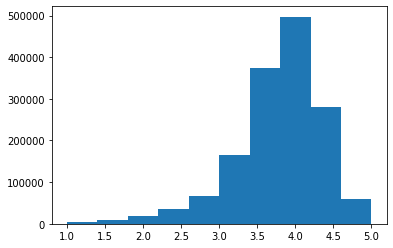

In [69]:
plt.figure()
plt.hist(beer_df["User Score"])
plt.show()

In [70]:
beer_df.head()

,URL,Beer name,Brewery,Style,Style_Ranked,ABV,Score,Score_Ranked,Avg Rating,Reviews,...,User Score,User_ratings,User comment,Username,Date Review,Look_rating,Smell_rating,tasting_rating,feel_rating,overall_rating
0,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,3.08,look: 3.5 | smell: 3 | taste: 3 | feel: 3.5 | ...,"deep russet brown, with no head anda very mini...",mikesgroove,"Sep 19, 2011",3.5,3.0,3.0,3.5,3.0
1,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,3.13,look: 3.5 | smell: 3 | taste: 3 | feel: 3 | ov...,This poured out as a pretty nice looking brown...,Knapp85,"Jun 11, 2011",3.5,3.0,3.0,3.0,3.5
2,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,4.07,look: 3.5 | smell: 4 | taste: 4 | feel: 4 | ov...,Thanks to my BA buddy WJVII for a brew I haven...,drizzam,"Sep 29, 2010",3.5,4.0,4.0,4.0,4.5
3,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,3.38,look: 3.5 | smell: 3 | taste: 3.5 | feel: 3.5 ...,A - pours a clear dark mahogany brown with no ...,mikereaser,"Jun 29, 2010",3.5,3.0,3.5,3.5,3.5
4,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,4.07,look: 3.5 | smell: 4 | taste: 4 | feel: 4 | ov...,"Another bock,Poured from the bottle a nice amb...",mvanaskie13,"May 25, 2010",3.5,4.0,4.0,4.0,4.5


In [71]:
beer_df.shape

(1511075, 27)

In [73]:
# I have decided to delete beers that have less than 3 ratings (N_Ratings column scrapped from beeradvocate.com)
# Beers that have less than3 ratings in the website are either too new or retired...
beer_df = beer_df[beer_df["N_Ratings"] >= 3]
len(beer_df["Beer name"].unique())

90242

##### Encoding Usernames 

In [74]:
beer_df["Username"].value_counts() 

StonedTrippin     14540
superspak         10499
metter98          10199
woodychandler      7474
Lone_Freighter     7325
                  ...  
saj2694               1
Andrejd               1
laxboy3496            1
dlino11               1
ryandelaney           1
Name: Username, Length: 36137, dtype: int64

In [75]:
from sklearn import preprocessing


In [76]:
username = beer_df["Username"]
username.shape

(1448216,)

In [77]:
le = preprocessing.LabelEncoder()
le.fit(username)

result = le.transform(username)


In [78]:
data = pd.DataFrame({"username" : username, "code" : result})

In [79]:
data[data["username"].str.contains("mike22ne")]

,username,code
4761,mike22ne,30115
12859,mike22ne,30115
14942,mike22ne,30115
35057,mike22ne,30115
36784,mike22ne,30115
...,...,...
2233396,mike22ne,30115
2233899,mike22ne,30115
2234131,mike22ne,30115
2242762,mike22ne,30115


In [80]:
data[data["username"].str.contains("superspak")].code.value_counts()

34131    10499
Name: code, dtype: int64

In [81]:
data.head()

,username,code
0,mikesgroove,30162
1,Knapp85,11051
2,drizzam,24945
3,mikereaser,30155
4,mvanaskie13,30731


In [82]:
data["code"].value_counts()

17789    14540
34131    10499
29987    10199
35772     7474
11658     7325
         ...  
33983        1
11170        1
24656        1
13217        1
26531        1
Name: code, Length: 36137, dtype: int64

In [83]:
data.shape

(1448216, 2)

In [84]:
beer_df.shape

(1448216, 27)

In [85]:
data.head()

,username,code
0,mikesgroove,30162
1,Knapp85,11051
2,drizzam,24945
3,mikereaser,30155
4,mvanaskie13,30731


In [86]:
beer_df["Username_id"] = data["code"]

C:\Users\gisel\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
beer_df[beer_df["Username"].str.contains("Knapp85")]

,URL,Beer name,Brewery,Style,Style_Ranked,ABV,Score,Score_Ranked,Avg Rating,Reviews,...,User_ratings,User comment,Username,Date Review,Look_rating,Smell_rating,tasting_rating,feel_rating,overall_rating,Username_id
1,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.000000,0.0,3.76,49,...,look: 3.5 | smell: 3 | taste: 3 | feel: 3 | ov...,This poured out as a pretty nice looking brown...,Knapp85,"Jun 11, 2011",3.50,3.00,3.00,3.00,3.50,11051
567,https://www.beeradvocate.com/beer/profile/9446...,Au Miel De Châtaignier,Brasserie Bourganel,French Bière de Garde,0.0,5.0,85.175407,0.0,3.92,2,...,look: 3 | smell: 4 | taste: 3.75 | feel: 3 | o...,This poured out as a slightly hazy copper colo...,Knapp85,"Apr 18, 2013",3.00,4.00,3.75,3.00,3.50,11051
875,https://www.beeradvocate.com/beer/profile/5039...,Form Extra,Fermentery Form,French Bière de Garde,0.0,7.2,85.175407,0.0,4.26,2,...,look: 4.25 | smell: 4.25 | taste: 4.25 | feel:...,Poured out as a vibrant golden yellow color wi...,Knapp85,"May 27, 2018",4.25,4.25,4.25,4.25,4.25,11051
2832,https://www.beeradvocate.com/beer/profile/1114...,French Kiss,Bullfrog Brewery,French Bière de Garde,76.0,7.2,86.000000,0.0,3.84,26,...,look: 3.5 | smell: 3.5 | taste: 3.5 | feel: 3....,This poured out as a cloudy yellow orange colo...,Knapp85,"Jul 26, 2011",3.50,3.50,3.50,3.50,3.50,11051
5060,https://www.beeradvocate.com/beer/profile/339/...,Exit 6 Wallonian Rye,Flying Fish Brewing Company,Belgian Pale Ale,46.0,7.5,86.000000,0.0,3.87,62,...,look: 3 | smell: 3 | taste: 2.5 | feel: 3.5 | ...,Exit 6 poured out as a fairly light looking br...,Knapp85,"Jun 01, 2011",3.00,3.00,2.50,3.50,3.00,11051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248991,https://www.beeradvocate.com/beer/profile/309/...,Jenlain Ambrée,Brasserie Duyck,French Bière de Garde,96.0,7.5,85.000000,0.0,3.77,215,...,look: 3 | smell: 3.5 | taste: 3.5 | feel: 3.5 ...,This poured out as a very nice clear orange co...,Knapp85,"Nov 04, 2012",3.00,3.50,3.50,3.50,3.50,11051
2250031,https://www.beeradvocate.com/beer/profile/2243...,Porterhouse Red,The Porterhouse Brewing Company,Irish Red Ale,70.0,4.4,83.000000,0.0,3.68,70,...,look: 4 | smell: 3.5 | taste: 4 | feel: 3.5 | ...,This brew poured out as a rather nice looking ...,Knapp85,"Oct 19, 2011",4.00,3.50,4.00,3.50,3.50,11051
2252161,https://www.beeradvocate.com/beer/profile/99/4...,Saranac Bohemian Pilsener,Matt Brewing Company / Saranac Brewery,Bohemian Pilsener,421.0,4.8,77.000000,0.0,3.38,148,...,look: 3.5 | smell: 3 | taste: 3.5 | feel: 3.5 ...,This beer poured out as a clear pale yellow co...,Knapp85,"Feb 09, 2012",3.50,3.00,3.50,3.50,3.50,11051
2252745,https://www.beeradvocate.com/beer/profile/309/...,Saint Druon De Sebourg (French Abbey Ale),Brasserie Duyck,Belgian Pale Ale,424.0,6.0,79.000000,0.0,3.43,94,...,look: 3.5 | smell: 3 | taste: 3 | feel: 3.5 | ...,This beer poured out as a decent looking golde...,Knapp85,"Dec 01, 2011",3.50,3.00,3.00,3.50,3.00,11051


In [88]:
beer_df[beer_df["Username"] == "mikesgroove"]

,URL,Beer name,Brewery,Style,Style_Ranked,ABV,Score,Score_Ranked,Avg Rating,Reviews,...,User_ratings,User comment,Username,Date Review,Look_rating,Smell_rating,tasting_rating,feel_rating,overall_rating,Username_id
0,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.60,84.0,0.0,3.76,49,...,look: 3.5 | smell: 3 | taste: 3 | feel: 3.5 | ...,"deep russet brown, with no head anda very mini...",mikesgroove,"Sep 19, 2011",3.5,3.0,3.0,3.5,3.0,30162
2991,https://www.beeradvocate.com/beer/profile/596/...,Portsmouth Bière De Garde,Portsmouth Brewery,French Bière de Garde,55.0,7.00,86.0,0.0,3.88,23,...,look: 4.5 | smell: 4 | taste: 4 | feel: 4 | ov...,another great new one from portsmouth. i still...,mikesgroove,"May 21, 2011",4.5,4.0,4.0,4.0,4.0,30162
3252,https://www.beeradvocate.com/beer/profile/1564...,Ovni Ale,St. Paul Brewing,French Bière de Garde,77.0,7.10,86.0,0.0,3.82,32,...,look: 4 | smell: 4 | taste: 4.5 | feel: 4.5 | ...,"A fantastic bottle to get as an extra, as I ha...",mikesgroove,"Nov 11, 2008",4.0,4.0,4.5,4.5,4.5,30162
4083,https://www.beeradvocate.com/beer/profile/64/1...,Shelter Pale Ale,Dogfish Head Craft Brewery,American Pale Ale (APA),2841.0,5.00,78.0,0.0,3.39,476,...,look: 4 | smell: 4.5 | taste: 4 | feel: 4.5 | ...,hazy burnt amber orange with a big white froth...,mikesgroove,"Aug 07, 2011",4.0,4.5,4.0,4.5,4.0,30162
4774,https://www.beeradvocate.com/beer/profile/1295...,Ginger Man Ale,Captain Lawrence Brewing Co.,Belgian Pale Ale,281.0,5.75,82.0,0.0,3.65,26,...,look: 3.5 | smell: 3 | taste: 3 | feel: 3.5 | ...,Another small growler sent down from NY for me...,mikesgroove,"Apr 04, 2010",3.5,3.0,3.0,3.5,3.0,30162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245695,https://www.beeradvocate.com/beer/profile/200/...,Saratoga Lager,Mendocino Brewing Company,German Märzen / Oktoberfest,460.0,6.00,81.0,0.0,3.54,48,...,look: 4 | smell: 3.5 | taste: 4 | feel: 4 | ov...,amber with a decent one inch or so of a head o...,mikesgroove,"Dec 03, 2011",4.0,3.5,4.0,4.0,4.0,30162
2245854,https://www.beeradvocate.com/beer/profile/394/...,Fest,Stoudts Brewing Co.,German Märzen / Oktoberfest,311.0,4.75,83.0,0.0,3.65,106,...,look: 3.5 | smell: 3.5 | taste: 3.5 | feel: 3....,Poured a nice and very clear ruby tinted brown...,mikesgroove,"Mar 20, 2011",3.5,3.5,3.5,3.5,3.5,30162
2249157,https://www.beeradvocate.com/beer/profile/1070...,Josephs Brau Summer Brew,Trader Joe's Brewing Company,German Kölsch,455.0,4.80,74.0,0.0,3.15,69,...,look: 4 | smell: 3 | taste: 3 | feel: 3.5 | ov...,Light yellow in color with a nice head of whit...,mikesgroove,"Dec 04, 2011",4.0,3.0,3.0,3.5,3.5,30162
2252231,https://www.beeradvocate.com/beer/profile/583/...,Pilsner,The Schlafly Tap Room,Bohemian Pilsener,101.0,5.00,84.0,0.0,3.72,127,...,look: 4.5 | smell: 4 | taste: 4 | feel: 4 | ov...,light pale golden color with a big white head ...,mikesgroove,"Sep 26, 2011",4.5,4.0,4.0,4.0,4.0,30162


 - Date of Review transformation 

In [89]:
beer_df["Date of Review"] = pd.to_datetime(beer_df["Date Review"], format = "%b %d, %Y", errors= "coerce")

C:\Users\gisel\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
beer_df.head()

,URL,Beer name,Brewery,Style,Style_Ranked,ABV,Score,Score_Ranked,Avg Rating,Reviews,...,User comment,Username,Date Review,Look_rating,Smell_rating,tasting_rating,feel_rating,overall_rating,Username_id,Date of Review
0,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,"deep russet brown, with no head anda very mini...",mikesgroove,"Sep 19, 2011",3.5,3.0,3.0,3.5,3.0,30162,2011-09-19
1,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,This poured out as a pretty nice looking brown...,Knapp85,"Jun 11, 2011",3.5,3.0,3.0,3.0,3.5,11051,2011-06-11
2,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,Thanks to my BA buddy WJVII for a brew I haven...,drizzam,"Sep 29, 2010",3.5,4.0,4.0,4.0,4.5,24945,2010-09-29
3,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,A - pours a clear dark mahogany brown with no ...,mikereaser,"Jun 29, 2010",3.5,3.0,3.5,3.5,3.5,30155,2010-06-29
4,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,"Another bock,Poured from the bottle a nice amb...",mvanaskie13,"May 25, 2010",3.5,4.0,4.0,4.0,4.5,30731,2010-05-25


In [91]:
beer_df["Date of Review"].max()

Timestamp('2020-03-05 00:00:00')

In [92]:
beer_df[beer_df["Date of Review"].isna()]
beer_df["Date of Review"].fillna(beer_df["Date of Review"].max(),inplace = True)

C:\Users\gisel\Anaconda3\envs\deeplearning\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [93]:
beer_df[beer_df["Date Review"].str.contains("Tuesday")]
# The recent reviews come with date as a day of the week, I converted then into the last day in the data set = 05-03-2020

,URL,Beer name,Brewery,Style,Style_Ranked,ABV,Score,Score_Ranked,Avg Rating,Reviews,...,User comment,Username,Date Review,Look_rating,Smell_rating,tasting_rating,feel_rating,overall_rating,Username_id,Date of Review
803735,https://www.beeradvocate.com/beer/profile/863/...,Robert Saison,Russian River Brewing Company,Belgian Saison,0.0,6.1,85.175407,0.0,4.11,4,...,This beer is Russian River to a T. It’s just d...,RaulMondesi,Tuesday at 12:57 AM,4.25,3.50,4.25,4.25,4.25,15453,2020-03-05
822274,https://www.beeradvocate.com/beer/profile/1814...,Gift Of The Magi,The Lost Abbey,French Bière de Garde,50.0,12.0,86.000000,0.0,3.84,319,...,Pours a clear coppery amber with persistent wh...,TrojanRB,Tuesday at 04:09 AM,4.00,4.00,3.50,3.75,3.75,19303,2020-03-05
831265,https://www.beeradvocate.com/beer/profile/3028...,Bald Irishman,Center of the Universe Brewing Company,Irish Red Ale,0.0,6.0,85.175407,0.0,3.57,5,...,Poured from a can with a briefly lived off-whi...,akaizer,Tuesday at 11:31 PM,4.00,3.50,3.50,3.50,3.50,20820,2020-03-05
852759,https://www.beeradvocate.com/beer/profile/9048...,Toña Cerveza,Industrial Cervecera S.A. / Compañía Cervecera...,American Adjunct Lager,319.0,4.6,65.000000,0.0,2.74,145,...,Look: Pours a very pale shade of yellow with a...,BloodSoakedAleMug,Tuesday at 05:06 PM,3.25,3.00,3.00,3.00,3.00,2609,2020-03-05
859143,https://www.beeradvocate.com/beer/profile/3092...,Mosaic Double IPA,Belching Beaver Brewery,American Imperial IPA,2663.0,8.8,89.000000,0.0,3.99,21,...,A four pack of pint cans picked up at Total Wi...,Mister_Faucher,Tuesday at 03:15 PM,4.00,4.25,4.00,3.75,4.00,13055,2020-03-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575975,https://www.beeradvocate.com/beer/profile/2874...,Hedonic Adaptation,Tree House Brewing Company,English Sweet / Milk Stout,78.0,9.1,92.000000,0.0,4.34,7,...,Picked-up a single can at the Tree House Brewe...,brewme,Tuesday at 09:43 PM,4.00,4.00,4.00,4.00,4.00,22645,2020-03-05
1578974,https://www.beeradvocate.com/beer/profile/2874...,Sense Of Wonder,Tree House Brewing Company,English Sweet / Milk Stout,31.0,9.6,95.000000,0.0,4.42,19,...,Picked-up a single can at the Tree House Brewe...,brewme,Tuesday at 10:49 PM,4.25,4.25,4.25,4.25,4.25,22645,2020-03-05
1707777,https://www.beeradvocate.com/beer/profile/3151...,NSFW,Liquid Riot Bottling Company,American Imperial IPA,1627.0,10.0,90.000000,0.0,4.11,12,...,Only very slightly hazy golden pour with a mas...,tekstr1der,Tuesday at 10:58 PM,4.25,4.00,4.00,4.00,4.00,34381,2020-03-05
1709117,https://www.beeradvocate.com/beer/profile/2874...,Curiosity Ninety,Tree House Brewing Company,American Imperial IPA,399.0,7.9,93.000000,0.0,4.39,5,...,"Had this on 2020-03-03 near Pittsburgh, PA fro...",Tucquan,Tuesday at 09:35 PM,4.00,4.25,4.25,4.25,4.25,19362,2020-03-05


In [94]:
beer_df.head(10)

,URL,Beer name,Brewery,Style,Style_Ranked,ABV,Score,Score_Ranked,Avg Rating,Reviews,...,User comment,Username,Date Review,Look_rating,Smell_rating,tasting_rating,feel_rating,overall_rating,Username_id,Date of Review
0,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,"deep russet brown, with no head anda very mini...",mikesgroove,"Sep 19, 2011",3.5,3.0,3.0,3.5,3.0,30162,2011-09-19
1,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,This poured out as a pretty nice looking brown...,Knapp85,"Jun 11, 2011",3.5,3.0,3.0,3.0,3.5,11051,2011-06-11
2,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,Thanks to my BA buddy WJVII for a brew I haven...,drizzam,"Sep 29, 2010",3.5,4.0,4.0,4.0,4.5,24945,2010-09-29
3,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,A - pours a clear dark mahogany brown with no ...,mikereaser,"Jun 29, 2010",3.5,3.0,3.5,3.5,3.5,30155,2010-06-29
4,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,"Another bock,Poured from the bottle a nice amb...",mvanaskie13,"May 25, 2010",3.5,4.0,4.0,4.0,4.5,30731,2010-05-25
5,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,Fresh bottle pour into tulip glass...great val...,BeerVikingSailor,"Mar 04, 2010",4.0,3.5,4.0,3.5,4.0,1942,2010-03-04
6,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,This is one of those beers that I picked up on...,bamadog,"Dec 27, 2009",4.0,4.0,4.0,3.5,4.0,21452,2009-12-27
7,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,"A-- nearly perfect 'crayon' brown, opaque with...",fightingwords,"Nov 12, 2009",3.5,4.0,3.0,4.0,3.5,25654,2009-11-12
8,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,Glazed terra cotta with apricot trim. Two fing...,BuckeyeNation,"Jul 07, 2009",4.0,4.0,4.0,4.0,4.0,3307,2009-07-07
9,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,Enjoyed on 06.22.09. Part of a BOTM Club selec...,ILikeGoodCider,"Jun 23, 2009",3.5,3.0,3.5,3.5,3.5,8724,2009-06-23


In [95]:
beer_df["Availability"].unique()

array(['Rotating', 'Year-round', 'Summer', 'Spring', 'Winter', 'One-off',
       'Fall', 'Unknown'], dtype=object)

In [96]:
beer_df.columns

Index(['URL', 'Beer name', 'Brewery', 'Style', 'Style_Ranked', 'ABV', 'Score',
       'Score_Ranked', 'Avg Rating', 'Reviews', 'N_Ratings', 'Brewery_Name',
       'Brewery_City', 'Brewery_Country', 'Availability', 'N_Wants', 'N_Gots',
       'User Score', 'User_ratings', 'User comment', 'Username', 'Date Review',
       'Look_rating', 'Smell_rating', 'tasting_rating', 'feel_rating',
       'overall_rating', 'Username_id', 'Date of Review'],
      dtype='object')

In [97]:
beer_df.shape

(1448216, 29)

In [98]:
# I found out some beers that have same name, such as Pale Ale, but they are from different brewerys.
#I need to investigate further, before encoding it. 

In [99]:
different_names = beer_df["Beer name"].value_counts()


In [100]:
different_names[different_names > 300]

Oktoberfest                      3622
Pale Ale                         3019
IPA                              3013
India Pale Ale                   2429
Imperial Stout                   2114
Oatmeal Stout                    2077
Pilsner                          1507
Porter                           1289
Saison                           1282
Amber Ale                        1274
Double IPA                       1256
Hefeweizen                       1111
Imperial IPA                     1030
Gose                              903
Milk Stout                        871
American Pale Ale                 842
Pumpkin Ale                       830
Lager                             709
Christmas Ale                     701
Pils                              656
Grand Cru                         637
Summer Ale                        627
Pilsener                          610
Berliner Weisse                   597
Coffee Stout                      597
Winter Warmer                     593
Blonde Ale  

In [101]:
beer_df[beer_df["Beer name"] == "Cream Ale"]

,URL,Beer name,Brewery,Style,Style_Ranked,ABV,Score,Score_Ranked,Avg Rating,Reviews,...,User comment,Username,Date Review,Look_rating,Smell_rating,tasting_rating,feel_rating,overall_rating,Username_id,Date of Review
285688,https://www.beeradvocate.com/beer/profile/1398...,Cream Ale,Empire Brewing Company - Brewpub,American Cream Ale,151.0,5.8,82.0,0.0,3.64,20,...,A go-to for me from this brewery.I enjoy cream...,GratefulBeerGuy,"Jul 20, 2016",3.50,3.25,3.75,4.00,3.50,7663,2016-07-20
285742,https://www.beeradvocate.com/beer/profile/1398...,Cream Ale,Empire Brewing Company - Brewpub,American Cream Ale,151.0,5.8,82.0,0.0,3.64,20,...,"On nitro at Rattle n Hum, NYC. A very pretty b...",seedyone,"Jun 17, 2016",4.25,4.25,4.75,4.75,4.50,33163,2016-06-17
285743,https://www.beeradvocate.com/beer/profile/1398...,Cream Ale,Empire Brewing Company - Brewpub,American Cream Ale,151.0,5.8,82.0,0.0,3.64,20,...,Had this on draught with nitro. What a treat.P...,logicalparadox,"Jul 05, 2015",5.00,3.25,4.50,5.00,5.00,29283,2015-07-05
285744,https://www.beeradvocate.com/beer/profile/1398...,Cream Ale,Empire Brewing Company - Brewpub,American Cream Ale,151.0,5.8,82.0,0.0,3.64,20,...,Had on nitro tap at Eataly is NYC. Great looki...,Budinetz,"Jun 11, 2015",4.00,3.25,3.50,4.00,3.50,3324,2015-06-11
285745,https://www.beeradvocate.com/beer/profile/1398...,Cream Ale,Empire Brewing Company - Brewpub,American Cream Ale,151.0,5.8,82.0,0.0,3.64,20,...,This beer got me on the second date. The rich ...,tjscott,"May 19, 2015",3.75,3.50,5.00,5.00,4.25,34770,2015-05-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679871,https://www.beeradvocate.com/beer/profile/2313...,Cream Ale,Two Goats Brewing,American Cream Ale,51.0,7.2,85.0,0.0,3.88,4,...,On tap at the Hector brewpub. A cool breeze is...,akorsak,"Aug 01, 2011",4.00,4.00,4.50,4.00,4.00,20834,2011-08-01
1679873,https://www.beeradvocate.com/beer/profile/2313...,Cream Ale,Two Goats Brewing,American Cream Ale,51.0,7.2,85.0,0.0,3.88,4,...,This cream ale has a body that is a light shad...,Hojaminbag,"Apr 10, 2011",4.00,3.50,3.50,4.00,3.50,8321,2011-04-10
1679874,https://www.beeradvocate.com/beer/profile/2313...,Cream Ale,Two Goats Brewing,American Cream Ale,51.0,7.2,85.0,0.0,3.88,4,...,Visited the 2 Goats brewery in Sept. and found...,brasil0022,"Jan 10, 2011",4.50,4.00,4.50,4.00,5.00,22550,2011-01-10
1679875,https://www.beeradvocate.com/beer/profile/2313...,Cream Ale,Two Goats Brewing,American Cream Ale,51.0,7.2,85.0,0.0,3.88,4,...,Poured a bright light copper hue with a half f...,plaid75,"Oct 30, 2010",3.50,3.50,3.50,4.00,3.50,31816,2010-10-30


In [102]:
# I have decided to create a new column with name of beer and brewery to encode each beer based on that!

In [103]:
beer_df["Beer + Brewery"] = beer_df["Beer name"] + " - " + beer_df["Brewery"]

C:\Users\gisel\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [104]:
beer_df.shape

(1448216, 30)

In [105]:
beer_df.head()

,URL,Beer name,Brewery,Style,Style_Ranked,ABV,Score,Score_Ranked,Avg Rating,Reviews,...,Username,Date Review,Look_rating,Smell_rating,tasting_rating,feel_rating,overall_rating,Username_id,Date of Review,Beer + Brewery
0,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,mikesgroove,"Sep 19, 2011",3.5,3.0,3.0,3.5,3.0,30162,2011-09-19,"Stegmaier Brewhouse Bock - Lion Brewery, Inc."
1,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,Knapp85,"Jun 11, 2011",3.5,3.0,3.0,3.0,3.5,11051,2011-06-11,"Stegmaier Brewhouse Bock - Lion Brewery, Inc."
2,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,drizzam,"Sep 29, 2010",3.5,4.0,4.0,4.0,4.5,24945,2010-09-29,"Stegmaier Brewhouse Bock - Lion Brewery, Inc."
3,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,mikereaser,"Jun 29, 2010",3.5,3.0,3.5,3.5,3.5,30155,2010-06-29,"Stegmaier Brewhouse Bock - Lion Brewery, Inc."
4,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,mvanaskie13,"May 25, 2010",3.5,4.0,4.0,4.0,4.5,30731,2010-05-25,"Stegmaier Brewhouse Bock - Lion Brewery, Inc."


In [106]:
beer = beer_df["Beer + Brewery"]
beer.head()

le = preprocessing.LabelEncoder()
le.fit(beer)

result = le.transform(beer)

In [107]:
beer_encoded = pd.DataFrame({"Beer + Brewery" : beer, "beer_code" : result})

In [108]:
beer_encoded["Beer + Brewery"].value_counts()

Barrel-Aged Narwhal - Sierra Nevada Brewing Co.                       179
J.W. Lees Harvest Ale (Sherry Cask) - J.W. Lees & Co (Brewers) Ltd    177
Jam Up The Mash - Collective Arts Brewing                             175
Cherry Jane - Lagunitas Brewing Company                               175
§ucaba - Firestone Walker Brewing Co.                                 153
                                                                     ... 
Roman Candle - Bluejacket / Arsenal Restaurant                          1
Topo Wit - Unmapped Brewing Company                                     1
Calamansi Wit - Forbidden Root Restaurant & Brewery                     1
Northwinds Rainmaker IPA - Northwinds Brewery                           1
Dirty Chai Bell Witch - Miskatonic Brewing Company                      1
Name: Beer + Brewery, Length: 100456, dtype: int64

In [109]:
beer_encoded.head()

,Beer + Brewery,beer_code
0,"Stegmaier Brewhouse Bock - Lion Brewery, Inc.",84627
1,"Stegmaier Brewhouse Bock - Lion Brewery, Inc.",84627
2,"Stegmaier Brewhouse Bock - Lion Brewery, Inc.",84627
3,"Stegmaier Brewhouse Bock - Lion Brewery, Inc.",84627
4,"Stegmaier Brewhouse Bock - Lion Brewery, Inc.",84627


In [110]:
beer_encoded.shape

(1448216, 2)

In [111]:
beer_df.shape

(1448216, 30)

In [112]:
beer_df["Beer_id"] = beer_encoded["beer_code"]

C:\Users\gisel\Anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [113]:
beer_df[beer_df["Beer name"] == "IPA"]

,URL,Beer name,Brewery,Style,Style_Ranked,ABV,Score,Score_Ranked,Avg Rating,Reviews,...,Date Review,Look_rating,Smell_rating,tasting_rating,feel_rating,overall_rating,Username_id,Date of Review,Beer + Brewery,Beer_id
87807,https://www.beeradvocate.com/beer/profile/4878...,IPA,Offshoot Beer Co.,New England IPA,0.0,6.7,85.175407,0.0,4.04,2,...,"Sep 27, 2018",3.25,3.75,3.50,3.00,3.50,17232,2018-09-27,IPA - Offshoot Beer Co.,44297
87812,https://www.beeradvocate.com/beer/profile/4878...,IPA,Offshoot Beer Co.,New England IPA,0.0,6.7,85.175407,0.0,4.04,2,...,"Aug 21, 2018",4.50,5.00,4.50,4.00,4.50,22839,2018-08-21,IPA - Offshoot Beer Co.,44297
353054,https://www.beeradvocate.com/beer/profile/3183...,IPA,Oyster Bay Brewing Co.,American Imperial IPA,3858.0,7.0,86.000000,0.0,3.66,12,...,"Feb 04, 2020",4.00,4.00,3.75,3.50,4.00,30438,2020-02-04,IPA - Oyster Bay Brewing Co.,44303
353099,https://www.beeradvocate.com/beer/profile/3183...,IPA,Oyster Bay Brewing Co.,American Imperial IPA,3858.0,7.0,86.000000,0.0,3.66,12,...,"Sep 03, 2018",3.50,3.75,3.50,4.00,3.50,3599,2018-09-03,IPA - Oyster Bay Brewing Co.,44303
353100,https://www.beeradvocate.com/beer/profile/3183...,IPA,Oyster Bay Brewing Co.,American Imperial IPA,3858.0,7.0,86.000000,0.0,3.66,12,...,"Jun 26, 2018",4.25,4.00,4.25,3.75,4.00,492,2018-06-26,IPA - Oyster Bay Brewing Co.,44303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053064,https://www.beeradvocate.com/beer/profile/5098...,IPA,Bravus Brewing Company,Low Alcohol Beer,16.0,0.5,71.000000,0.0,3.28,10,...,"May 10, 2019",3.75,3.00,3.75,3.25,3.75,2257,2019-05-10,IPA - Bravus Brewing Company,44186
2053065,https://www.beeradvocate.com/beer/profile/5098...,IPA,Bravus Brewing Company,Low Alcohol Beer,16.0,0.5,71.000000,0.0,3.28,10,...,"Dec 17, 2018",1.00,1.00,1.00,1.00,1.00,21985,2018-12-17,IPA - Bravus Brewing Company,44186
2053066,https://www.beeradvocate.com/beer/profile/5098...,IPA,Bravus Brewing Company,Low Alcohol Beer,16.0,0.5,71.000000,0.0,3.28,10,...,"Sep 26, 2018",3.00,3.50,3.00,3.00,3.50,9940,2018-09-26,IPA - Bravus Brewing Company,44186
2053067,https://www.beeradvocate.com/beer/profile/5098...,IPA,Bravus Brewing Company,Low Alcohol Beer,16.0,0.5,71.000000,0.0,3.28,10,...,"May 22, 2018",2.00,2.25,2.75,2.75,2.75,19678,2018-05-22,IPA - Bravus Brewing Company,44186


In [114]:
#beer_df.to_csv("beer_data/total_df.csv")

In [115]:
beer_df.columns

Index(['URL', 'Beer name', 'Brewery', 'Style', 'Style_Ranked', 'ABV', 'Score',
       'Score_Ranked', 'Avg Rating', 'Reviews', 'N_Ratings', 'Brewery_Name',
       'Brewery_City', 'Brewery_Country', 'Availability', 'N_Wants', 'N_Gots',
       'User Score', 'User_ratings', 'User comment', 'Username', 'Date Review',
       'Look_rating', 'Smell_rating', 'tasting_rating', 'feel_rating',
       'overall_rating', 'Username_id', 'Date of Review', 'Beer + Brewery',
       'Beer_id'],
      dtype='object')

In [116]:
model_df = beer_df[["Beer_id","Username_id", "User Score"]].copy()

In [117]:
model_df.copy()

,Beer_id,Username_id,User Score
0,84627,30162,3.08
1,84627,11051,3.13
2,84627,24945,4.07
3,84627,30155,3.38
4,84627,30731,4.07
...,...,...,...
2254635,3351,19796,4.00
2254636,3351,28137,3.91
2254637,3351,14433,3.73
2254638,3351,7718,4.26


In [118]:
model_df.shape

(1448216, 3)

In [119]:
model_df = model_df.drop_duplicates()

In [120]:
#model_df.to_csv("beer_data/model_data.csv")

 - For the cold start problem, I'd like to recommend local beers! That's why I have decided to select only BC Beers below to use for new users!

In [121]:
beers_bc = beer_df[beer_df["Brewery_City"] == "British Columbia"]

In [122]:
#beers_bc.to_csv("beer_data/beer_bc.csv")

In [123]:
beers_bc.shape

(18241, 31)

In [124]:
beers_bc[beers_bc["Beer name"] == "Bayard Saison"]

,URL,Beer name,Brewery,Style,Style_Ranked,ABV,Score,Score_Ranked,Avg Rating,Reviews,...,Date Review,Look_rating,Smell_rating,tasting_rating,feel_rating,overall_rating,Username_id,Date of Review,Beer + Brewery,Beer_id
133720,https://www.beeradvocate.com/beer/profile/3822...,Bayard Saison,Strange Fellows Brewing,Belgian Saison,1140.0,6.5,87.0,0.0,3.88,3,...,"May 16, 2018",4.00,4.25,4.0,4.0,4.25,12166,2018-05-16,Bayard Saison - Strange Fellows Brewing,7993
133751,https://www.beeradvocate.com/beer/profile/3822...,Bayard Saison,Strange Fellows Brewing,Belgian Saison,1140.0,6.5,87.0,0.0,3.88,3,...,"Sep 14, 2017",4.00,3.75,4.0,4.0,4.00,11553,2017-09-14,Bayard Saison - Strange Fellows Brewing,7993
133752,https://www.beeradvocate.com/beer/profile/3822...,Bayard Saison,Strange Fellows Brewing,Belgian Saison,1140.0,6.5,87.0,0.0,3.88,3,...,"May 25, 2015",3.75,4.00,4.0,4.0,4.00,17576,2015-05-25,Bayard Saison - Strange Fellows Brewing,7993
2227120,https://www.beeradvocate.com/beer/profile/3822...,Bayard Saison,Strange Fellows Brewing,Belgian Saison,1141.0,6.5,87.0,0.0,3.88,3,...,"May 16, 2018",4.00,4.25,4.0,4.0,4.25,12166,2018-05-16,Bayard Saison - Strange Fellows Brewing,7993
2227150,https://www.beeradvocate.com/beer/profile/3822...,Bayard Saison,Strange Fellows Brewing,Belgian Saison,1141.0,6.5,87.0,0.0,3.88,3,...,"Sep 14, 2017",4.00,3.75,4.0,4.0,4.00,11553,2017-09-14,Bayard Saison - Strange Fellows Brewing,7993
2227151,https://www.beeradvocate.com/beer/profile/3822...,Bayard Saison,Strange Fellows Brewing,Belgian Saison,1141.0,6.5,87.0,0.0,3.88,3,...,"May 25, 2015",3.75,4.00,4.0,4.0,4.00,17576,2015-05-25,Bayard Saison - Strange Fellows Brewing,7993


In [125]:
beer_df.head()

,URL,Beer name,Brewery,Style,Style_Ranked,ABV,Score,Score_Ranked,Avg Rating,Reviews,...,Date Review,Look_rating,Smell_rating,tasting_rating,feel_rating,overall_rating,Username_id,Date of Review,Beer + Brewery,Beer_id
0,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,"Sep 19, 2011",3.5,3.0,3.0,3.5,3.0,30162,2011-09-19,"Stegmaier Brewhouse Bock - Lion Brewery, Inc.",84627
1,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,"Jun 11, 2011",3.5,3.0,3.0,3.0,3.5,11051,2011-06-11,"Stegmaier Brewhouse Bock - Lion Brewery, Inc.",84627
2,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,"Sep 29, 2010",3.5,4.0,4.0,4.0,4.5,24945,2010-09-29,"Stegmaier Brewhouse Bock - Lion Brewery, Inc.",84627
3,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,"Jun 29, 2010",3.5,3.0,3.5,3.5,3.5,30155,2010-06-29,"Stegmaier Brewhouse Bock - Lion Brewery, Inc.",84627
4,https://www.beeradvocate.com/beer/profile/150/...,Stegmaier Brewhouse Bock,"Lion Brewery, Inc.",German Bock,39.0,6.6,84.0,0.0,3.76,49,...,"May 25, 2010",3.5,4.0,4.0,4.0,4.5,30731,2010-05-25,"Stegmaier Brewhouse Bock - Lion Brewery, Inc.",84627
